project8//Gauss_S1.00_NL0.30_B0.50_new/
Write to  project8//Gauss_S1.00_NL0.30_B0.50_new/
Generating event  0


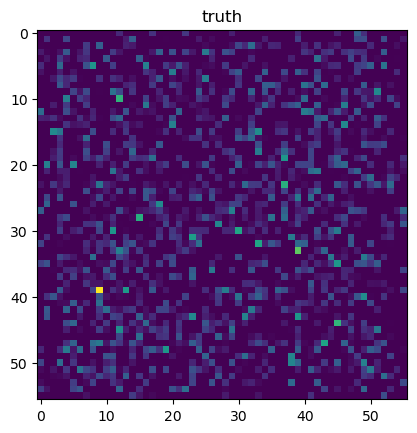

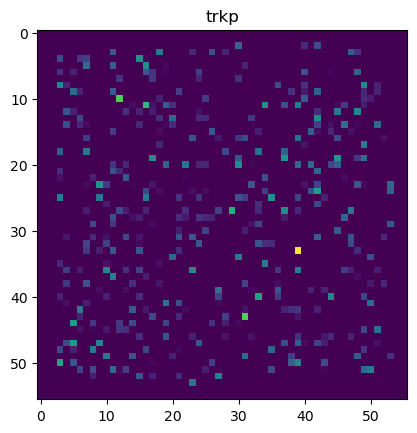

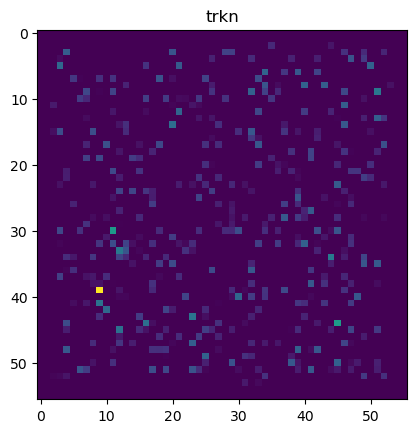

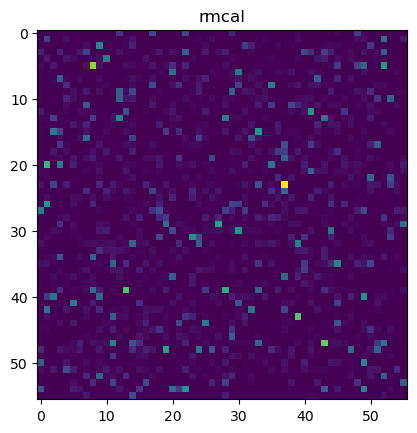

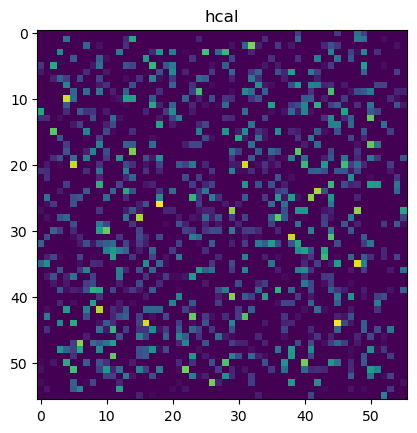

Generating event  100
Generating event  200
Generating event  300
Generating event  400
Generating event  500
Generating event  600
Generating event  700
Generating event  800
Generating event  900
Generating event  1000
Generating event  1100
Generating event  1200
Generating event  1300
Generating event  1400
Generating event  1500
Generating event  1600
Generating event  1700
Generating event  1800
Generating event  1900
Generating event  2000
Generating event  2100
Generating event  2200
Generating event  2300
Generating event  2400
Generating event  2500
Generating event  2600
Generating event  2700
Generating event  2800
Generating event  2900
Generating event  3000
Generating event  3100
Generating event  3200
Generating event  3300
Generating event  3400
Generating event  3500
Generating event  3600
Generating event  3700
Generating event  3800
Generating event  3900
Generating event  4000
Generating event  4100
Generating event  4200
Generating event  4300
Generating event  44

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import skimage.io as io

PartMult = 1600
kNeutralPiFrac  = 0.25
kNeutralHadFrac = 0.5
    
kMaxEta = 2.5
kBField = 0.5

kNEvent = 10000
kImSize = 56

kResScale = 1.0
kTRKres = 0.05 * kResScale
kEMCres = 0.05 * kResScale
kHCALres = 0.1 * kResScale

kNonLin = 0.3

fDir = "project8//"
fDir = fDir + f"Gauss_S{kResScale:.2f}_NL{kNonLin:.2f}_B{kBField:.2f}_new/"
print(fDir)
#fDir = "/Users/rolandg/Desktop/Data/GaussNonLocalTest/"

print("Write to ",fDir)

Charge = np.empty(PartMult)
Hadron = np.empty(PartMult)
Energy = np.empty(PartMult)
eta    = np.empty(PartMult)
phi    = np.empty(PartMult)
WTruth = np.empty(PartMult)

for n in range(kNEvent):
    if(n%100 == 0):
        print("Generating event ",n)
    for i in range(PartMult):
        Energy[i] = abs(np.random.normal()+np.random.normal(0,2))
        WTruth[i] = Energy[i]
        x = np.random.rand()
        if x < kNeutralPiFrac:
            Charge[i] = 0
            Hadron[i] = 0
        elif x < kNeutralHadFrac:
            Charge[i] = 0
            Hadron[i] = 1
        else:
            if(np.random.rand() > 0.5):
                Charge[i] = 1
            else:
                Charge[i] = -1
            Hadron[i] = 1
        if(Charge[i] == 0):
            eta[i] = (np.random.rand() - 0.5) * 2 * kMaxEta
            phi[i] = (np.random.rand() - 0.5) * 2 * np.pi
        else:
            eta[i] = (np.random.rand() - 0.5) * 1.8 * kMaxEta
            phi[i] = (np.random.rand() - 0.5) * 1.8 * np.pi
        
    c_truth,xe,ye = np.histogram2d(eta,phi, weights = WTruth,
                                range = [[-kMaxEta,kMaxEta],[-np.pi,np.pi]],
                            bins = (kImSize,kImSize))
    
    #tracker
    kMinTrackE = 0.1
    WTrkP = np.zeros(PartMult)
    for i in range(PartMult):
        if(Charge[i] > 0 and Energy[i] > kMinTrackE):
            WTrkP[i] = Energy[i] * np.random.normal(1,kTRKres)
            
    WTrkN = np.zeros(PartMult)
    for i in range(PartMult):
        if(Charge[i] < 0 and Energy[i] > kMinTrackE):
            WTrkN[i] = Energy[i] * np.random.normal(1,kTRKres)

    c_trkp,xe,ye = np.histogram2d(eta,phi,weights = WTrkP, 
                                    range = [[-kMaxEta,kMaxEta],[-np.pi,np.pi]],
                            bins = (kImSize,kImSize))
    
    c_trkn,xe,ye = np.histogram2d(eta,phi,weights = WTrkN, 
                                    range = [[-kMaxEta,kMaxEta],[-np.pi,np.pi]],
                            bins = (kImSize,kImSize))

    for i in range(PartMult):
        if(Charge[i] > 0):
            phi[i] = phi[i] + kBField * 1/(Energy[i])
        elif (Charge[i] < 0):
            phi[i] = phi[i] - kBField * 1/(Energy[i])
            
        
    #Emcal
    WEmcal = np.zeros(PartMult)
    kMinEmcalE = 0.2
    for i in range(PartMult):
        if(Hadron[i] == 0 and Energy[i] > kMinEmcalE):
            WEmcal[i] = (Energy[i] - kNonLin * np.sqrt(Energy[i])) * 0.9 * np.random.normal(1,kEMCres)
            Energy[i] = Energy[i] * 0.1
        elif (Energy[i] > kMinEmcalE):
            WEmcal[i] = Energy[i] * 0.1 * np.random.normal(1,kEMCres)
            Energy[i] = Energy[i] * 0.9

    #Hcal
    WHcal = np.zeros(PartMult)
    kMinHcalE = 0.3
    for i in range(PartMult):
        if(Energy[i] > kMinHcalE):
            WHcal[i] = (Energy[i] - kNonLin * np.sqrt(Energy[i])) * 0.9 * np.random.normal(1,kHCALres)
            Energy[i] = Energy[i] * 0.1
    
 
  
    c_emcal,xe,ye = np.histogram2d(eta,phi,weights = WEmcal, 
                                range = [[-kMaxEta,kMaxEta],[-np.pi,np.pi]],
                            bins = (kImSize,kImSize))

    c_hcal,xe,ye = np.histogram2d(eta,phi,weights = WHcal, 
                                range = [[-kMaxEta,kMaxEta],[-np.pi,np.pi]],
                            bins = (kImSize,kImSize))

    fname = fDir + "truth_" + str(n) + ".tiff"
    io.imsave(fname,c_truth)
    fname = fDir + "trkp_" + str(n) + ".tiff"
    io.imsave(fname,c_trkp)
    fname = fDir + "trkn_" + str(n) + ".tiff"
    io.imsave(fname,c_trkn)
    fname = fDir + "emcal_" + str(n) + ".tiff"
    io.imsave(fname,c_emcal)
    fname = fDir + "hcal_" + str(n) + ".tiff"
    io.imsave(fname,c_hcal)
    if(n==0):
        plt.imshow(c_truth)
        plt.title("truth")
        plt.show()
        plt.title("trkp")
        plt.imshow(c_trkp)
        plt.show()
        plt.imshow(c_trkn)
        plt.title("trkn")
        plt.show()
        plt.imshow(c_emcal)
        plt.title("rmcal")
        plt.show()
        plt.imshow(c_hcal)
        plt.title("hcal")
        plt.show()


In [7]:
fDir = "/Users/rolandg/Desktop/Data/"
fname = fDir + f"Gauss_S{kResScale:2f}_NL{kNonLin:2f}_B{kBField:2f}"


NameError: name 'kResScale' is not defined

In [5]:
fname

'/Users/rolandg/Desktop/Data/Gauss_S{kResScale:2f}_NL{kNonLin:2f}_B{kBField:2f}'